In [0]:
import numpy as np
import pandas as pd
import researchpy as rp
import seaborn as sns
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
pip install researchpy

In [0]:
nch = pd.read_csv("final.csv")

In [175]:
print(nch.shape)

(22310, 4)


In [176]:
print(nch.columns)

Index(['Age', 'Sex', 'District', 'Final Diagnosis'], dtype='object')


In [177]:
nch["Sex"].value_counts()

Female    12568
Male       9742
Name: Sex, dtype: int64

In [178]:
nch["Age"].value_counts()

6-11 Month    707
1             600
2             546
30            541
25            536
             ... 
91              7
93              6
98              3
99              2
105             1
Name: Age, Length: 105, dtype: int64

In [179]:
nch = nch.rename(columns= {'District': 'Place'})
nch["Place"].value_counts()

Chitwan        13642
Nawalparasi     4472
Makwanpur       1063
Gorkha           758
Tanahu           529
               ...  
Jajarkot           1
Doti               1
Dolakha            1
Aachham            1
Taplejung          1
Name: Place, Length: 66, dtype: int64

In [180]:
nch["Final Diagnosis"].value_counts()

MED               7867
PED               4315
SURGICAL          3113
Gynaecology       2995
ORTHO             1791
ICU                912
NICU               460
PSY                292
Cardiology         283
Clinical           136
CTVS                59
Cardiology ICU      42
CTVS-ICU            25
NEURO               18
Neuro                2
Name: Final Diagnosis, dtype: int64

In [181]:
nch.duplicated().any() #if any duplicated data

True

In [0]:
nch.drop_duplicates(keep=False)
nch.drop_duplicates(keep=False, inplace=True)

In [183]:
nch.describe()

,Age,Sex,Place,Final Diagnosis
count,2473,2473,2473,2473
unique,104,2,66,15
top,35,Female,Chitwan,SURGICAL
freq,57,1346,317,510


In [184]:
nch.head(18)

,Age,Sex,Place,Final Diagnosis
28,77,Female,Chitwan,Gynaecology
29,31,Female,Rupandehi,Gynaecology
37,30,Female,Kailali,Gynaecology
72,22,Female,Surkhet,Gynaecology
80,27,Female,Rautahat,Gynaecology
121,45,Female,Gorkha,Gynaecology
123,66,Female,Nawalparasi,Gynaecology
124,73,Female,Nawalparasi,Gynaecology
150,48,Female,Baglung,Gynaecology
160,49,Female,Kapilvastu,Gynaecology


In [185]:
nch.isna().sum()       #checked missing values

Age                0
Sex                0
Place              0
Final Diagnosis    0
dtype: int64

In [0]:
nch.replace('Neuro','NEURO',inplace=True)

In [187]:
nch["Final Diagnosis"].value_counts()

SURGICAL          510
MED               508
ORTHO             328
ICU               297
Gynaecology       210
PED               147
Cardiology        133
PSY               106
Clinical           58
NICU               52
CTVS               49
Cardiology ICU     34
CTVS-ICU           23
NEURO              18
Name: Final Diagnosis, dtype: int64

In [188]:
nch.sample(10)

,Age,Sex,Place,Final Diagnosis
10068,65,Female,Siraha,MED
3046,64,Female,Chitwan,Cardiology
4242,74,Female,Lamjung,MED
3372,45,Female,Nawalparasi,CTVS
18786,23,Male,Chitwan,PSY
12228,73,Male,Syangja,ORTHO
20020,46,Female,Rautahat,SURGICAL
2785,43,Female,Lamjung,Gynaecology
6661,67,Male,Sarlahi,MED
18859,33,Female,Bara,PSY


In [189]:
nch["Place"].value_counts()

Chitwan        317
Nawalparasi    282
Gorkha         213
Makwanpur      202
Tanahu         199
              ... 
Bajura           1
Jajarkot         1
Mugu             1
Doti             1
Aachham          1
Name: Place, Length: 66, dtype: int64

In [0]:
nch.replace('Chitwan','Chitwan & Parsa',inplace=True)
nch.replace('Parsa','Chitwan & Parsa',inplace=True)

In [191]:
nch["Age"].value_counts()

35     57
45     53
55     46
50     45
40     45
       ..
89      3
97      2
93      2
105     1
98      1
Name: Age, Length: 104, dtype: int64

In [0]:
nch.replace('Less than a day','0.0027',inplace=True)
nch.replace('1-3 months','0.33',inplace=True)
nch.replace('6-11 Month','0.91',inplace=True)
nch.replace('4-6 months','0.5',inplace=True)

In [193]:
nch["Age"].value_counts()

35     57
45     53
55     46
40     45
50     45
       ..
89      3
93      2
97      2
105     1
98      1
Name: Age, Length: 104, dtype: int64

In [194]:
nch["Place"].value_counts()

Chitwan & Parsa    343
Nawalparasi        282
Gorkha             213
Makwanpur          202
Tanahu             199
                  ... 
Jajarkot             1
Dhankuta             1
Maygdi               1
Doti                 1
Bajura               1
Name: Place, Length: 65, dtype: int64

# merging districts with less number to a zone

In [0]:
nch.replace(['Ilam','Jhapa','Taplejung','Panchthhar'],'Mechi',inplace=True)

In [0]:
nch.replace(['Sankhuwashava','Sankhuwashava','Dhankuta','Bhojpur','Sunsari','Morang'],'Koshi',inplace=True)

In [0]:
nch.replace(['Saptari','Siraha','Khotang','Udayapur'],'Sagarmatha',inplace=True)

In [0]:
nch.replace(['Dhanusa','Sindhuli'],'Janakpur',inplace=True)

In [0]:
nch.replace(['Mahottari','Sarlahi','Dolakha','Ramechhap'],'Janakpur',inplace=True)

In [200]:
nch["Place"].value_counts()

Chitwan & Parsa    343
Nawalparasi        282
Gorkha             213
Makwanpur          202
Tanahu             199
Lamjung            185
Janakpur           165
Bara               127
Rautahat            93
Rupandehi           70
Dang                66
Dhading             58
Baglung             48
Kaski               44
Gulmi               37
Syangja             34
Palpa               32
Sagarmatha          25
Bardiya             24
Kapilvastu          22
Koshi               20
Mechi               18
Banke               17
Kathmandu           16
 Arghakhanchi       12
Parbat              12
Rolpa               10
Myagdi              10
Kanchanpur           8
Kailali              8
Rukum                8
Surkhet              7
Jumla                7
India                7
Pyuthan              6
Simara               5
Sindhupalchowk       4
Kalikot              4
Dailekh              4
Dhangadi             3
Other country        2
Salyan               2
Nuwakot              2
Manang     

In [0]:
nch.replace(['Mahottari','Sarlahi','Dolakha','Simara'],'Janakpur',inplace=True)

In [0]:
nch.replace(['Sindhupalchowk','Dhading','Nuwakot','Rasuwa','Bhaktapur','Kathmandu'],'Bagmati',inplace=True)

In [0]:
nch.replace(['Parbat','Myagdi','Baglung','Maygdi'],'Dhaulagiri',inplace=True)
nch.replace(['Lamjung','Manang','Syangja','Tanahu','Kaski','Gorkha'],'Gandaki',inplace=True)
nch.replace(['Dailekh','Jajarkot','Surkhet','Bardiya','Banke'],'Bheri',inplace=True)
nch.replace(['Kalikot','Mugu','Jumla','Humla','Dolpa'],'Karnali',inplace=True)
nch.replace(['Rolpa','Rukum','Salyan','Pyuthan','Dang'],'Rapti',inplace=True)
nch.replace(['Darchula','Kanchanpur','Dadeldhura','Baitadi'],'Mahakali',inplace=True)
nch.replace(['Bajura','Doti','Kailali','Bajhang','Achham','Aachham','Dhangadi'],'Seti',inplace=True)

In [204]:
nch["Place"].value_counts()

Gandaki            677
Chitwan & Parsa    343
Nawalparasi        282
Makwanpur          202
Janakpur           170
Bara               127
Rautahat            93
Rapti               92
Bagmati             76
Dhaulagiri          71
Rupandehi           70
Bheri               53
Gulmi               37
Palpa               32
Sagarmatha          25
Kapilvastu          22
Koshi               20
Mechi               18
Seti                14
 Arghakhanchi       12
Karnali             12
Mahakali             8
India                7
Sindhupalchowk       4
Sankhuwashava        2
Other Country        2
Other country        2
Name: Place, dtype: int64

In [0]:
nch.replace(['Other Country','Other country','India'],'Outside country',inplace=True)

In [206]:
nch["Place"].value_counts()

Gandaki            677
Chitwan & Parsa    343
Nawalparasi        282
Makwanpur          202
Janakpur           170
Bara               127
Rautahat            93
Rapti               92
Bagmati             76
Dhaulagiri          71
Rupandehi           70
Bheri               53
Gulmi               37
Palpa               32
Sagarmatha          25
Kapilvastu          22
Koshi               20
Mechi               18
Seti                14
Karnali             12
 Arghakhanchi       12
Outside country     11
Mahakali             8
Sindhupalchowk       4
Sankhuwashava        2
Name: Place, dtype: int64

In [207]:
nch[nch["Place"] == 'Gulmi']

,Age,Sex,Place,Final Diagnosis
577,40,Female,Gulmi,Gynaecology
1217,28,Female,Gulmi,Gynaecology
2674,24,Female,Gulmi,Gynaecology
3317,76,Male,Gulmi,Cardiology
4104,47,Male,Gulmi,MED
4223,78,Male,Gulmi,ICU
5562,68,Female,Gulmi,ICU
6114,31,Female,Gulmi,MED
6993,69,Female,Gulmi,MED
8110,57,Female,Gulmi,MED


In [208]:
nch.duplicated().any() #if any duplicated data

True

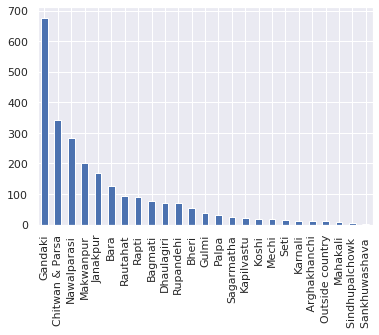

In [209]:
nch['Place'].value_counts().plot.bar()

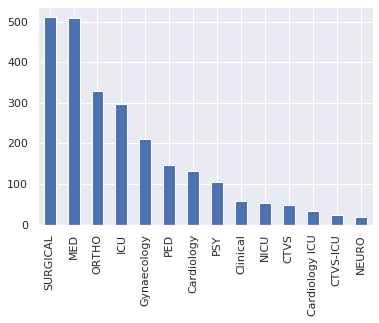

In [210]:
nch['Final Diagnosis'].value_counts().plot.bar()

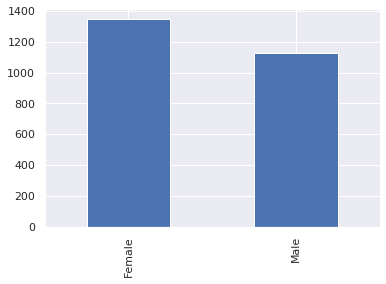

In [211]:
nch['Sex'].value_counts().plot.bar()

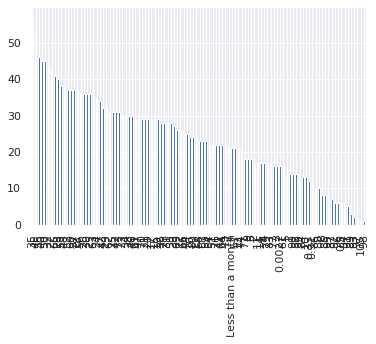

In [212]:
nch['Age'].value_counts().plot.bar()

In [0]:
nch.replace('Less than a month','0.082',inplace=True)

In [0]:
nch.drop_duplicates(keep=False)
nch.drop_duplicates(keep=False, inplace=True)

In [215]:
nch.describe()

,Age,Sex,Place,Final Diagnosis
count,2104,2104,2104,2104
unique,104,2,25,14
top,35,Female,Gandaki,MED
freq,48,1163,361,398


In [216]:
from scipy.stats import chisquare
chisquare([104,2,25,14])

Power_divergenceResult(statistic=176.13103448275862, pvalue=6.03858110321843e-38)

In [217]:
rp.summary_cat(nch[['Age','Sex']])

,Variable,Outcome,Count,Percent
0,Age,35,48,2.28
1,,45,46,2.19
2,,40,41,1.95
3,,22,39,1.85
4,,32,36,1.71
...,...,...,...,...
101,,93,2,0.10
102,,98,1,0.05
103,,105,1,0.05
104,Sex,Female,1163,55.28


In [218]:
rp.summary_cat(nch[['Final Diagnosis','Place']])

,Variable,Outcome,Count,Percent
0,Final Diagnosis,MED,398,18.92
1,,SURGICAL,392,18.63
2,,ORTHO,284,13.50
3,,ICU,268,12.74
4,,Gynaecology,175,8.32
5,,Cardiology,133,6.32
6,,PED,126,5.99
7,,PSY,104,4.94
8,,Clinical,58,2.76
9,,CTVS,49,2.33


#chi square first:
first is chi- square value
p-value 
and third is degree of freedom 
and lastly expected frequencies in array.


In [219]:
crosstab = pd.crosstab(nch['Sex'],nch['Place']) #chi sqauare first is Chi- Square value, second p value, third degree of freedom and lastly expected frequencies in array
crosstab
stats.chi2_contingency(crosstab)

(37.95397549760182,
 0.03505071669977994,
 24,
 array([[  6.63307985,  40.9039924 ,  70.20009506,  23.76853612,
         189.59553232,  38.14020913, 199.54515209,  20.4519962 ,
          75.7276616 ,  12.16064639,   6.63307985,  11.05513308,
           4.42205323, 111.65684411,   9.94961977, 155.87737643,
           4.97480989,  17.68821293,  48.64258555,  51.40636882,
          38.69296578,  13.81891635,   1.10551331,   7.73859316,
           2.21102662],
        [  5.36692015,  33.0960076 ,  56.79990494,  19.23146388,
         153.40446768,  30.85979087, 161.45484791,  16.5480038 ,
          61.2723384 ,   9.83935361,   5.36692015,   8.94486692,
           3.57794677,  90.34315589,   8.05038023, 126.12262357,
           4.02519011,  14.31178707,  39.35741445,  41.59363118,
          31.30703422,  11.18108365,   0.89448669,   6.26140684,
           1.78897338]]))

In [220]:
crosstab = pd.crosstab(nch['Age'],nch['Final Diagnosis']) #chi sqauare first is Chi- Square value, second p value, third degree of freedom and lastly expected frequencies in array
crosstab
stats.chi2_contingency(crosstab)

(1998.1907633890319,
 5.587492280339316e-29,
 1339,
 array([[0.27946768, 0.13117871, 0.75855513, ..., 0.71863118, 0.59315589,
         2.23574144],
        [0.39591255, 0.1858365 , 1.07461977, ..., 1.01806084, 0.84030418,
         3.16730038],
        [0.23288973, 0.10931559, 0.63212928, ..., 0.59885932, 0.49429658,
         1.86311787],
        ...,
        [0.13973384, 0.06558935, 0.37927757, ..., 0.35931559, 0.29657795,
         1.11787072],
        [0.04657795, 0.02186312, 0.12642586, ..., 0.11977186, 0.09885932,
         0.37262357],
        [0.02328897, 0.01093156, 0.06321293, ..., 0.05988593, 0.04942966,
         0.18631179]]))

In [221]:
table, results = rp.crosstab(nch['Sex'],nch['Place'], prop = 'col', test = 'chi-square')
table

Place                  ...                                
        Arghakhanchi Bagmati    Bara  ...    Seti Sindhupalchowk      All
Sex                                   ...                                
Female         91.67   58.11   52.76  ...   64.29            75.0   55.28
Male            8.33   41.89   47.24  ...   35.71            25.0   44.72
All           100.00  100.00  100.00  ...  100.00           100.0  100.00

[3 rows x 26 columns]

In [222]:
results

,Chi-square test,results
0,Pearson Chi-square ( 24.0) =,37.9540
1,p-value =,0.0351
2,Cramer's V =,0.1343


In [223]:
table, results = rp.crosstab(nch['Age'],nch['Final Diagnosis'], prop = 'col', test = 'chi-square')
table

Final Diagnosis                      ...                        
                  CTVS CTVS-ICU Cardiology  ...    PSY SURGICAL     All
Age                                         ...                        
0.0027            0.00      0.0       0.00  ...    0.0     0.00    0.57
0.082             0.00      0.0       0.00  ...    0.0     0.26    0.81
0.33              0.00      0.0       0.00  ...    0.0     0.77    0.48
0.5               0.00      0.0       0.00  ...    0.0     0.26    0.29
0.91              0.00      0.0       0.00  ...    0.0     0.00    0.43
...                ...      ...        ...  ...    ...      ...     ...
95                2.04      0.0       0.75  ...    0.0     0.00    0.24
96                0.00      0.0       1.50  ...    0.0     0.00    0.29
97                0.00      0.0       0.00  ...    0.0     0.00    0.10
98                0.00      0.0       0.00  ...    0.0     0.26    0.05
All             100.00    100.0     100.00  ...  100.0   100.00  100.00

[105 rows x 15 columns]

In [224]:
results

,Chi-square test,results
0,Pearson Chi-square ( 1339.0) =,1998.1908
1,p-value =,0.0000
2,Cramer's V =,0.2703


In [225]:
table, results = rp.crosstab(nch['Age'],nch['Sex'], prop = 'col', test = 'chi-square')
table

Sex                
        Female    Male     All
Age                           
0.0027    0.52    0.64    0.57
0.082     0.60    1.06    0.81
0.33      0.34    0.64    0.48
0.5       0.17    0.43    0.29
0.91      0.17    0.74    0.43
...        ...     ...     ...
95        0.34    0.11    0.24
96        0.09    0.53    0.29
97        0.09    0.11    0.10
98        0.00    0.11    0.05
All     100.00  100.00  100.00

[105 rows x 3 columns]

In [226]:
results

,Chi-square test,results
0,Pearson Chi-square ( 103.0) =,89.6720
1,p-value =,0.8225
2,Cramer's V =,0.2064


In [227]:
table, results = rp.crosstab(nch['Age'],nch['Place'], prop = 'col', test = 'chi-square')
table

Place                  ...                                
        Arghakhanchi Bagmati    Bara  ...    Seti Sindhupalchowk      All
Age                                   ...                                
0.0027           0.0    1.35    0.00  ...    0.00             0.0    0.57
0.082            0.0    1.35    0.79  ...    0.00            25.0    0.81
0.33             0.0    1.35    0.00  ...    0.00             0.0    0.48
0.5              0.0    0.00    0.79  ...    0.00             0.0    0.29
0.91             0.0    0.00    0.79  ...    7.14             0.0    0.43
...              ...     ...     ...  ...     ...             ...     ...
95               0.0    0.00    0.00  ...    0.00             0.0    0.24
96               0.0    0.00    0.79  ...    0.00             0.0    0.29
97               0.0    0.00    0.00  ...    0.00             0.0    0.10
98               0.0    0.00    0.00  ...    0.00             0.0    0.05
All            100.0  100.00  100.00  ...  100.00           100.0  100.00

[105 rows x 26 columns]

In [228]:
results

,Chi-square test,results
0,Pearson Chi-square ( 2472.0) =,2136.9486
1,p-value =,1.0000
2,Cramer's V =,0.2057


In [229]:
table, results = rp.crosstab(nch['Sex'],nch['Final Diagnosis'], prop = 'col', test = 'chi-square')
table
results


,Chi-square test,results
0,Pearson Chi-square ( 13.0) =,168.5257
1,p-value =,0.0000
2,Cramer's V =,0.2830


In [230]:
table, results = rp.crosstab(nch['Place'],nch['Final Diagnosis'], prop = 'col', test = 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 312.0) =,749.1463
1,p-value =,0.0000
2,Cramer's V =,0.1655


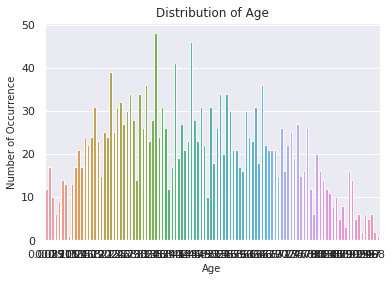

In [231]:
Age_count = nch['Age'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Age_count.index, Age_count.values, alpha=0.9)
plt.title('Distribution of Age')
plt.ylabel('Number of Occurrence', fontsize = 10)
plt.xlabel('Age', fontsize =10)
plt.show()

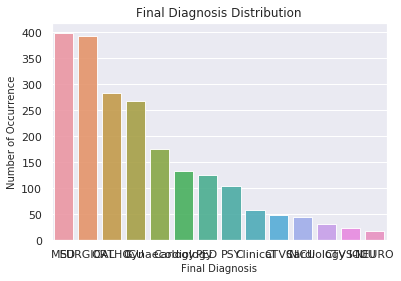

In [232]:
nch = nch.rename(columns= {'Final Diagnosis': 'FinalDiagnosis'})
FinalDiagnosis_count = nch['FinalDiagnosis'].value_counts()
sns.set(style="darkgrid")
sns.barplot(FinalDiagnosis_count.index, FinalDiagnosis_count.values, alpha=0.9)
plt.title('Final Diagnosis Distribution')
plt.ylabel('Number of Occurrence', fontsize = 10 )
plt.xlabel('Final Diagnosis', fontsize = 10)
plt.show()

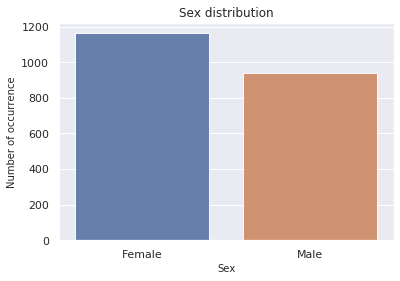

In [233]:
Sex_count = nch['Sex'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Sex_count.index, Sex_count.values, alpha=0.9)
plt.title('Sex distribution')
plt.ylabel('Number of occurrence', fontsize = 10)
plt.xlabel('Sex', fontsize = 10)
plt.show()

In [234]:
nch["Sex"].value_counts()

Female    1163
Male       941
Name: Sex, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder #change sex to numerical by label encoder
number = LabelEncoder()
nch["Sex"] = number.fit_transform(nch["Sex"].astype('str'))

In [236]:
nch["Sex"].value_counts()

0    1163
1     941
Name: Sex, dtype: int64

In [237]:
nch.head(10)

,Age,Sex,Place,FinalDiagnosis
28,77,0,Chitwan & Parsa,Gynaecology
29,31,0,Rupandehi,Gynaecology
37,30,0,Seti,Gynaecology
80,27,0,Rautahat,Gynaecology
123,66,0,Nawalparasi,Gynaecology
124,73,0,Nawalparasi,Gynaecology
150,48,0,Dhaulagiri,Gynaecology
160,49,0,Kapilvastu,Gynaecology
181,21,0,Rupandehi,Gynaecology
188,51,0,Makwanpur,Gynaecology


In [238]:
nch['FinalDiagnosis'].value_counts()

MED               398
SURGICAL          392
ORTHO             284
ICU               268
Gynaecology       175
Cardiology        133
PED               126
PSY               104
Clinical           58
CTVS               49
NICU               44
Cardiology ICU     32
CTVS-ICU           23
NEURO              18
Name: FinalDiagnosis, dtype: int64

In [239]:
print(nch['FinalDiagnosis'].dtypes)

object


In [0]:
nch['Age'] = nch.Age.astype(float)

In [241]:
print(nch['Sex'].dtypes)

int64


In [242]:
print(nch['Place'].dtypes)

object


In [243]:
print(nch['Age'].dtypes)

float64


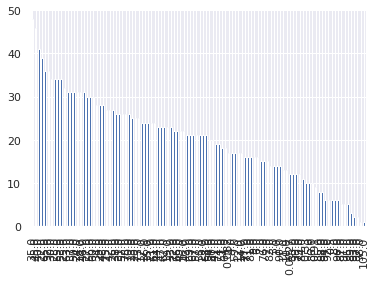

In [244]:
nch['Age'].value_counts().plot.bar()

In [245]:
nch['Age'].value_counts()

35.0     48
45.0     46
40.0     41
22.0     39
65.0     36
         ..
89.0      3
93.0      2
97.0      2
98.0      1
105.0     1
Name: Age, Length: 104, dtype: int64

In [246]:
nch.head(10)

,Age,Sex,Place,FinalDiagnosis
28,77.0,0,Chitwan & Parsa,Gynaecology
29,31.0,0,Rupandehi,Gynaecology
37,30.0,0,Seti,Gynaecology
80,27.0,0,Rautahat,Gynaecology
123,66.0,0,Nawalparasi,Gynaecology
124,73.0,0,Nawalparasi,Gynaecology
150,48.0,0,Dhaulagiri,Gynaecology
160,49.0,0,Kapilvastu,Gynaecology
181,21.0,0,Rupandehi,Gynaecology
188,51.0,0,Makwanpur,Gynaecology


In [0]:
number = LabelEncoder()
nch["Place"] = number.fit_transform(nch["Place"].astype('str'))
nch["FinalDiagnosis"] = number.fit_transform(nch["FinalDiagnosis"].astype('str'))

In [248]:
nch.head(10) #all are changed to label encoding

,Age,Sex,Place,FinalDiagnosis
28,77.0,0,4,5
29,31.0,0,20,5
37,30.0,0,23,5
80,27.0,0,19,5
123,66.0,0,15,5
124,73.0,0,15,5
150,48.0,0,5,5
160,49.0,0,9,5
181,21.0,0,20,5
188,51.0,0,13,5


In [249]:
nch.corr()

,Age,Sex,Place,FinalDiagnosis
Age,1.000000,0.029767,-0.061904,-0.193856
Sex,0.029767,1.000000,-0.001693,0.045048
Place,-0.061904,-0.001693,1.000000,0.040684
FinalDiagnosis,-0.193856,0.045048,0.040684,1.000000


In [250]:
1-nch.corr()

,Age,Sex,Place,FinalDiagnosis
Age,0.000000,0.970233,1.061904,1.193856
Sex,0.970233,0.000000,1.001693,0.954952
Place,1.061904,1.001693,0.000000,0.959316
FinalDiagnosis,1.193856,0.954952,0.959316,0.000000


Text(0.5, 1, 'Correlation')

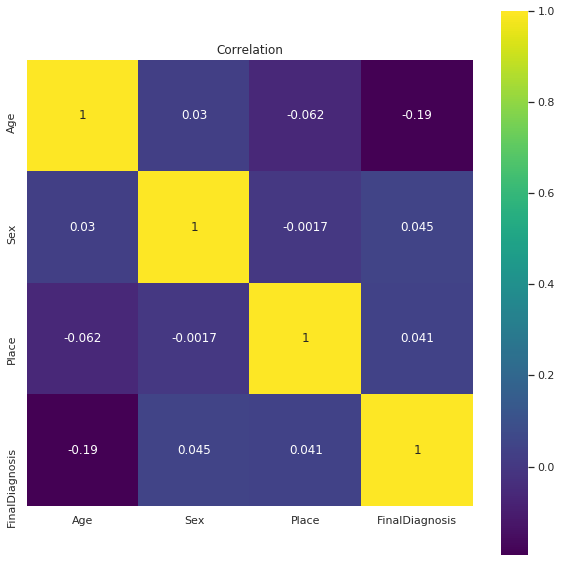

In [251]:
correlation = nch.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation')

In [0]:
nch.Age = pd.to_numeric(nch.Age)  #change to numeric type data
nch.Sex = pd.to_numeric(nch.Sex)
nch.Place = pd.to_numeric(nch.Place)
nch.FinalDiagnosis = pd.to_numeric(nch.FinalDiagnosis)

In [253]:
print(nch['FinalDiagnosis'].dtypes)

int64


In [254]:
nch['FinalDiagnosis'].value_counts()

7     398
13    392
10    284
6     268
5     175
2     133
11    126
12    104
4      58
0      49
9      44
3      32
1      23
8      18
Name: FinalDiagnosis, dtype: int64

In [255]:
nch['FinalDiagnosis'].head(10)

28     5
29     5
37     5
80     5
123    5
124    5
150    5
160    5
181    5
188    5
Name: FinalDiagnosis, dtype: int64

**One hot encoding all the data** 

In [256]:
nch_onehot = nch.copy()
nch_onehot = pd.get_dummies(nch_onehot, columns = ['Sex','FinalDiagnosis','Place'], prefix =['Sex','FinalDiagnosis','Place'] )
print(nch_onehot)

        Age  Sex_0  Sex_1  ...  Place_22  Place_23  Place_24
28     77.0      1      0  ...         0         0         0
29     31.0      1      0  ...         0         0         0
37     30.0      1      0  ...         0         1         0
80     27.0      1      0  ...         0         0         0
123    66.0      1      0  ...         0         0         0
...     ...    ...    ...  ...       ...       ...       ...
22281  31.0      1      0  ...         0         0         0
22282  52.0      0      1  ...         0         0         0
22291  37.0      1      0  ...         0         0         0
22301  68.0      0      1  ...         0         0         0
22304  10.0      0      1  ...         0         0         0

[2104 rows x 42 columns]


In [257]:
print(nch_onehot.head(3))

     Age  Sex_0  Sex_1  ...  Place_22  Place_23  Place_24
28  77.0      1      0  ...         0         0         0
29  31.0      1      0  ...         0         0         0
37  30.0      1      0  ...         0         1         0

[3 rows x 42 columns]


In [258]:
nch_onehot['FinalDiagnosis_2'].value_counts()

0    1971
1     133
Name: FinalDiagnosis_2, dtype: int64

**Standard scaling above data**

In [0]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
Nchs = SS.fit_transform(nch_onehot)

In [260]:
Nchs

array([[ 1.39988652,  0.89950784, -0.89950784, ..., -0.03084598,
        -0.08184476, -0.04364358],
       [-0.51739275,  0.89950784, -0.89950784, ..., -0.03084598,
        -0.08184476, -0.04364358],
       [-0.55907273,  0.89950784, -0.89950784, ..., -0.03084598,
        12.21825332, -0.04364358],
       ...,
       [-0.26731284,  0.89950784, -0.89950784, ..., -0.03084598,
        -0.08184476, -0.04364358],
       [ 1.02476667, -1.11171904,  1.11171904, ..., -0.03084598,
        -0.08184476, -0.04364358],
       [-1.39267242, -1.11171904,  1.11171904, ..., -0.03084598,
        -0.08184476, -0.04364358]])

**Dimensionality reduction of above using pca**

In [0]:
from sklearn.decomposition import PCA

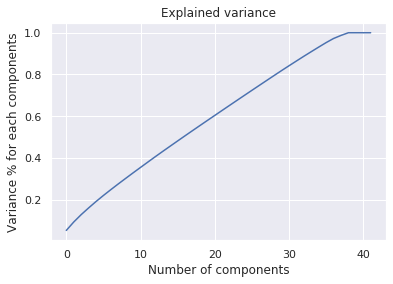

In [262]:
#fitting the pca algorithm with our data
pca=PCA().fit(Nchs)
#plotting the cumulative summation of the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance % for each components')
plt.title('Explained variance')
plt.show()

**From above it seems that we need to select nearly 37 components for 100% variance data**

In [0]:
pca=PCA(n_components=37)

In [264]:
pca.fit(Nchs)

PCA(copy=True, iterated_power='auto', n_components=37, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_pca=pca.transform(Nchs)

In [266]:
Nchs.shape

(2104, 42)

In [267]:
x_pca.shape

(2104, 37)

Text(0, 0.5, 'Second PCA')

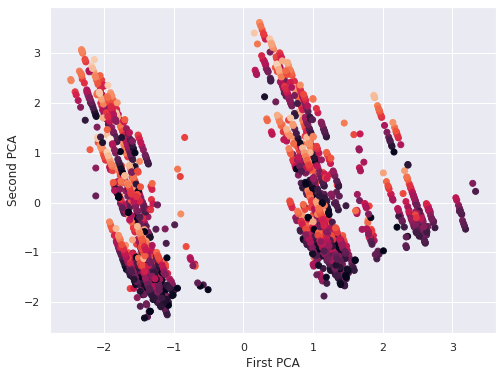

In [268]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=nch['Age'])
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

Text(0, 0.5, 'Second PCA')

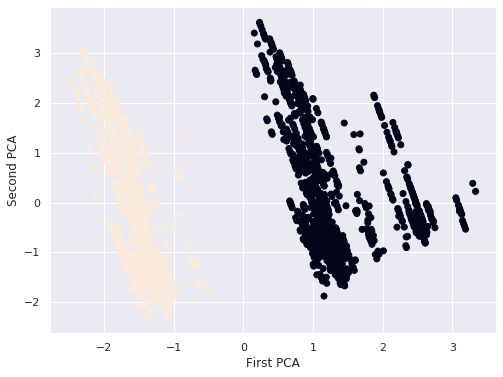

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=nch['Sex'])
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

Text(0, 0.5, 'Second PCA')

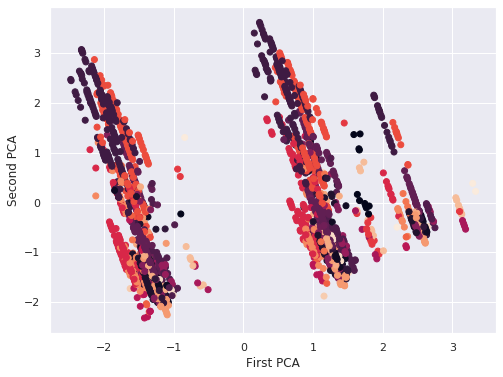

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=nch['Place'])
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

Text(0, 0.5, 'Second PCA')

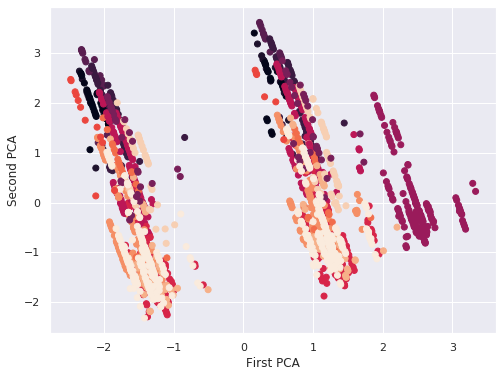

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=nch['FinalDiagnosis'])
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

In [0]:
nch.keys()

Index(['Age', 'Sex', 'Place', 'FinalDiagnosis'], dtype='object')

In [0]:

mean_vec = np.mean(Nchs, axis = 0)   #covariance matrix
cov_mat = (Nchs - mean_vec).T.dot((Nchs - mean_vec))/(Nchs.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00047551 -0.0297811   0.0297811  ... -0.00117496 -0.03458702
  -0.02528419]
 [-0.0297811   1.00047551 -1.00047551 ... -0.00327449  0.01483835
   0.01732169]
 [ 0.0297811  -1.00047551  1.00047551 ...  0.00327449 -0.01483835
  -0.01732169]
 ...
 [-0.00117496 -0.00327449  0.00327449 ...  1.00047551 -0.00252578
  -0.00134687]
 [-0.03458702  0.01483835 -0.01483835 ... -0.00252578  1.00047551
  -0.0035737 ]
 [-0.02528419  0.01732169 -0.01732169 ... -0.00134687 -0.0035737
   1.00047551]]


In [0]:
print('Numpy covariance matrix: \n%s' %np.cov(Nchs.T)) #usingnumpy

Numpy covariance matrix: 
[[ 1.00047551 -0.0297811   0.0297811  ... -0.00117496 -0.03458702
  -0.02528419]
 [-0.0297811   1.00047551 -1.00047551 ... -0.00327449  0.01483835
   0.01732169]
 [ 0.0297811  -1.00047551  1.00047551 ...  0.00327449 -0.01483835
  -0.01732169]
 ...
 [-0.00117496 -0.00327449  0.00327449 ...  1.00047551 -0.00252578
  -0.00134687]
 [-0.03458702  0.01483835 -0.01483835 ... -0.00252578  1.00047551
  -0.0035737 ]
 [-0.02528419  0.01732169 -0.01732169 ... -0.00134687 -0.0035737
   1.00047551]]


In [0]:
#eigen vectors and eigen values
cov_mat = np.cov(Nchs.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigen vectors \n%s' %eig_vecs)
print('\nEigen values \n%s' %eig_vals)

Eigen vectors 
[[-0.07568983  0.29789614  0.54434981 ... -0.0559468   0.0306399
  -0.00937166]
 [ 0.63463586  0.13867613  0.0188147  ... -0.00105603 -0.01065613
   0.00425797]
 [-0.63463586 -0.13867613 -0.0188147  ...  0.00105603  0.01065613
  -0.00425797]
 ...
 [-0.00325836 -0.03302217  0.02594789 ... -0.06531893 -0.1055768
  -0.0047094 ]
 [ 0.01985256 -0.04913259 -0.03811695 ...  0.10833441  0.21407199
   0.12882149]
 [ 0.03930663  0.0092138  -0.07762155 ...  0.24994768  0.07586668
   0.17894976]]

Eigen values 
[ 2.21802538e+00  1.68598681e+00  1.48470967e+00  5.41937421e-01
  6.17429063e-01 -2.48298286e-16 -1.83618542e-15  4.00716671e-16
  1.34666077e+00  1.29459741e+00  8.28770531e-01  1.22301776e+00
  1.17494003e+00  1.14871665e+00  9.01215993e-01  1.11997994e+00
  1.11265323e+00  9.19848821e-01  9.28497385e-01  1.09388024e+00
  1.08901665e+00  1.08417890e+00  9.52676926e-01  9.58982468e-01
  1.06308056e+00  9.68726755e-01  1.05027085e+00  1.04487518e+00
  1.04015679e+00  9.87587

In [0]:
cor_mat1 = np.corrcoef(Nchs.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigen vectors \n%s' %eig_vecs)
print('\nEigen values \n%s' %eig_vals)

Eigen vectors 
[[-0.07568983 -0.29789614 -0.54434981 ... -0.0559468   0.0306399
  -0.00937166]
 [ 0.63463586 -0.13867613 -0.0188147  ... -0.00105603 -0.01065613
   0.00425797]
 [-0.63463586  0.13867613  0.0188147  ...  0.00105603  0.01065613
  -0.00425797]
 ...
 [-0.00325836  0.03302217 -0.02594789 ... -0.06531893 -0.1055768
  -0.0047094 ]
 [ 0.01985256  0.04913259  0.03811695 ...  0.10833441  0.21407199
   0.12882149]
 [ 0.03930663 -0.0092138   0.07762155 ...  0.24994768  0.07586668
   0.17894976]]

Eigen values 
[ 2.21697119e+00  1.68518549e+00  1.48400401e+00  5.41679846e-01
  6.17135608e-01  1.07645435e-16 -1.55758311e-15  3.92987040e-16
  1.34602072e+00  1.29398210e+00  8.28376629e-01  1.22243648e+00
  1.17438160e+00  1.14817068e+00  9.00787658e-01  1.11944763e+00
  1.11212440e+00  9.19411631e-01  9.28056084e-01  1.09336033e+00
  1.08849906e+00  1.08366361e+00  9.52224132e-01  9.58526678e-01
  1.06257530e+00  9.68266333e-01  1.04977167e+00  1.04437856e+00
  1.03966242e+00  9.87117

**Appling KMeans with above result**

In [0]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_pca)
    Sum_of_squared_distances.append(km.inertia_)

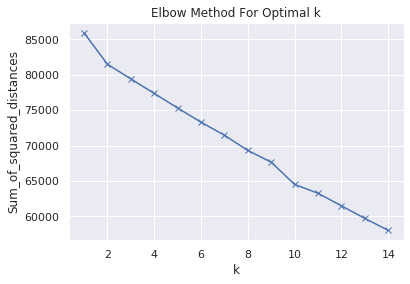

In [271]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=1000, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
y_kmeans=kmeans.fit_predict(x_pca)

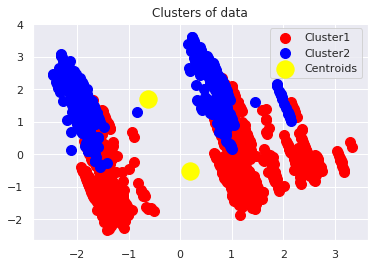

In [273]:
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
#plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=100,c='cyan',label='Cluster3')
#plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1],s=100,c='green',label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of data')
plt.legend()
plt.show()


In [0]:
kmeans = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=1000, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
y_kmeans=kmeans.fit_predict(x_pca)

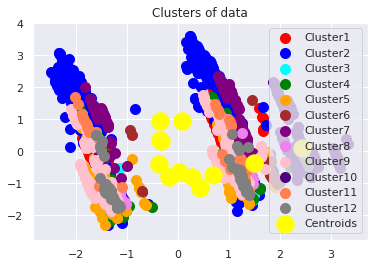

In [275]:
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=100,c='cyan',label='Cluster3')
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1],s=100,c='green',label='Cluster4')
plt.scatter(x_pca[y_kmeans==4,0],x_pca[y_kmeans==4,1],s=100,c='orange',label='Cluster5')
plt.scatter(x_pca[y_kmeans==5,0],x_pca[y_kmeans==5,1],s=100,c='brown',label='Cluster6')
plt.scatter(x_pca[y_kmeans==6,0],x_pca[y_kmeans==6,1],s=100,c='purple',label='Cluster7')
plt.scatter(x_pca[y_kmeans==7,0],x_pca[y_kmeans==7,1],s=100,c='violet',label='Cluster8')
plt.scatter(x_pca[y_kmeans==8,0],x_pca[y_kmeans==8,1],s=100,c='pink',label='Cluster9')
plt.scatter(x_pca[y_kmeans==9,0],x_pca[y_kmeans==9,1],s=100,c='indigo',label='Cluster10')
plt.scatter(x_pca[y_kmeans==10,0],x_pca[y_kmeans==10,1],s=100,c='coral',label='Cluster11')
plt.scatter(x_pca[y_kmeans==11,0],x_pca[y_kmeans==11,1],s=100,c='grey',label='Cluster12')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of data')
plt.legend()
plt.show()


# last one got different values than others so trying out with svd

In [0]:
cor_mat2 = np.corrcoef(nch.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)
print('Eigen vectors \n%s' %eig_vecs)
print('Eigen values \n%s' %eig_vals)

Eigen vectors 
[[-0.66272239  0.66916369 -0.24117486  0.23420862]
 [ 0.35792957  0.01384629 -0.03925771  0.93282021]
 [-0.00983648 -0.33796836 -0.94060212 -0.03079426]
 [-0.65771475 -0.66166882  0.23571418  0.27211119]]
Eigen values 
[0.82999826 1.16647117 0.97849965 1.02503093]


In [0]:
from scipy.linalg import svd
u,s,v = np.linalg.svd(Nchs.T)
print('Vector U:\n' %u)
print(u)
print(s)
print(v)

Vector U:

[[-1.10438811e-01  2.40700546e-01 -5.15625702e-01 ... -2.67069217e-17
   1.43549704e-16  1.41880522e-17]
 [ 6.30494044e-01  1.50731616e-01 -6.17903581e-02 ...  2.56718151e-01
   6.47416738e-01 -1.22259388e-01]
 [-6.30494044e-01 -1.50731616e-01  6.17903581e-02 ...  2.56718151e-01
   6.47416738e-01 -1.22259388e-01]
 ...
 [-2.79137412e-03 -3.67339280e-02 -1.27774829e-02 ...  4.36742340e-03
   4.29153705e-03  3.18961992e-02]
 [ 1.96855643e-02 -4.07581130e-02  1.75307149e-02 ...  1.15220858e-02
   1.13218833e-02  8.41481829e-02]
 [ 4.01224416e-02  1.34953300e-02  8.74431215e-02 ...  6.17353033e-03
   6.06626189e-03  4.50865728e-02]]
[6.84111173e+01 5.93992984e+01 5.50113736e+01 5.30152346e+01
 5.21386401e+01 5.07482226e+01 4.96907931e+01 4.91262718e+01
 4.85437157e+01 4.83603038e+01 4.79698696e+01 4.78612696e+01
 4.77447976e+01 4.72568868e+01 4.70293253e+01 4.68851705e+01
 4.68233872e+01 4.65760702e+01 4.64409918e+01 4.63601578e+01
 4.62605301e+01 4.62333079e+01 4.61475600e+01 4.

In [0]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0,np.linalg.norm(ev))
print('Everthing ok')

Everthing ok


In [0]:
#making list of (eigenvalue,eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vecs))]

#sorting the eigen value and eigen vector tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

#visually conforming that list are in descending order
print('Eigen values in descending order')
for i in eig_pairs:
    print(i[0])


Eigen values in descending order
1.1664711669196102
1.0250309279160252
0.9784996455465309
0.8299982596178336


In [0]:
#explained variance tells us how much information(variance) can be attributed to each of the principal components
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

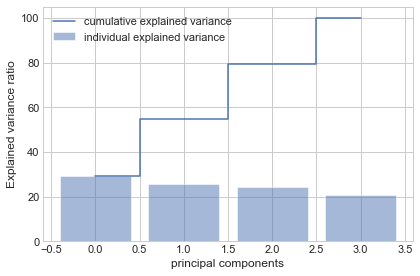

In [0]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    plt.bar(range(4),var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('principal components')
    plt.legend(loc='best')
    plt.tight_layout()

figure from above shows mostly 4 components contains about equal amount of information. need to take 4 important components